# Лабораторная работа по предмету "Уравнения математической физики"

**Выполнил**: Давыдов Себастьян Ибрагимович (ПМ-31) (sebastian@mail.ru)

**Преподаватель**: Гурьянов М.А., кафедра ВМ-1

###### Вариант индивидуальной задачи № 28

###### 2 семестр, 2021 год

###### МИЭТ, Зеленоград

> Если отчет оформляется в Markdown или Jupyter notebook, то такого вступления достаточно. Если отчет выполняется в MS Word или OpenOffice то обязательно использовать стандартный для МИЭТ титульный лист. Титульный лист содержит ту же самую информацию, но с форматированием на странице размера А4.
>
> Для электронного документа (Jupyter \ MD \ Latex):
>
> * Обязательно указание электронной почты
> * Выкладывается в Google Drive или Яндекс.Драйв в общую папку по решению преподавателя. 
> * Папка должна содержать: Сам файл отчета, его версию в PDF, папку с программой (скриптами) и отдельно папку со всеми картинками
> * При сдаче по эл.почте отправляется ZIP архив внутри которого такая же структура файлов.
> * Все изображения вставляются относительными путями (проверьте настройки своего редактора)
> * Весь код должен быть оформлен в соответствующих секциях (не забывайте указывать язык программирования чтобы синтаксис был подсвечен)

In [2]:
#Backed rendering for animated plots, 
# INLINE is the default for static images, 
# WIDGETS is the good option for the Jupyter lab
# QT5 works best in VS CODE


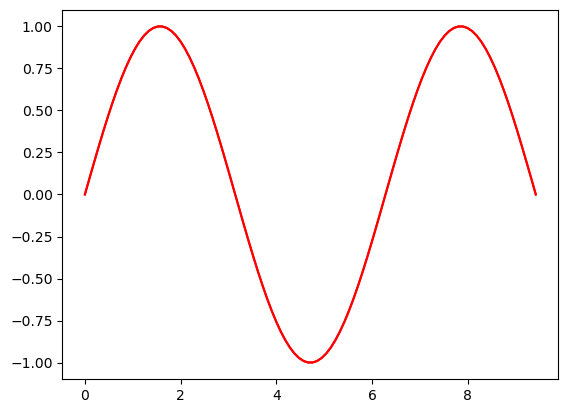

In [2]:



import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation


fig = plt.figure()

def animated_sinc(frame_number):
    x = np.linspace(0,3*math.pi,100)
    y = np.sin(x + frame_number*math.pi/30)
    line, = plt.plot(x,y,'r-')
    return line,

sine_animation = animation.FuncAnimation(fig,animated_sinc, frames = 300, blit = True)
plt.show()

### 1. Постановка задачи (2 лабораторная работа)

> В этом разделе необходимо словами максимально подробно описать поставленную задачу. Первая часть - то как задачу вам выдал преподаватель, Ctrl +C =>Ctrl+V

Процесс свободного колебания струны длины L. Левый конец закреплен, правый висит в воздухе. В начальный момент времени изгиб струны можно описать формулой $\phi(x) = \sin (\frac 3 2\pi \frac x L )$. 

> Далее вы должны написать свои мысли по поводу задачи, включая те моменты которые были пропущены в постановке преподавателя (эти моменты потом станут **параметрами** в решении)

Сопротивлением воздуха и массой струны можно пренебречь. Струна считается абсолютно тонкой, однородной и нерастяжимой. Свободное колебание струны на правом конце можно описать граничным условием второго рода, закрепленный конец стрнуны подчинаяется граничному условию первого рода.

Предположим что струна у нас  - гитарная стальная струна, сила преднатяжения которой (типовая) равна 60Н, а материал изготовления - сталь с плотностью  $7700 \;кг/м^3$. Тогда параметр краевой задачи $c = \sqrt{\frac T \rho} \approx  0.088$ 

> Для струны можно выбрать струны из пластика (лески, ПВХ), металла (разного). Можно посчитать вибрации деревянной или бумажной пластины с минимальным натяжением (как например излучатели в колонках).
>
> Для уравнения теплопроводности можно смело выбирать разные металлы с разной теплопроводностью или даже воду или спирт в запаяной трубке.

В начальном условии не уточнаяется, но мы решая задачу будем считать начальное распределение скоростей нулевым: $U_t = \psi(x) = 0$ 

> Начальное распределение очень важно и вызовет множество доп.заданий и доп.вопросов, обязательно предусмотрите свою программу так, чтобы можно было задать не ноль и ничего не сломалось

Дифференциальное уравнение колебаний тогда можно записать как:
$$
U_{tt} = 0.0078 \cdot U_{xx} \\
\begin{cases}
U(x,0) = \sin (\frac 3 2\pi \frac x L )\\
U_t (x,0) = 0\\
U(0,t) = 0\\
U_x(L,t) = 0
\end{cases}
$$

> Обратите внимание, что у нас нет никаких F и прочих посторонних букв значение которых мы не знаем!

> **ОЦЕНКА** **В ОРИОКС** за эту часть лабораторной работы составляет приблизительно 0.5 баллов из 10, начисляется в графу "лабораторные работы"
>
> **КРИТЕРИЙ** - это полнота данного пункта, в особенности - то как вы проанализировали части задачи, которые в явном виде в условии не упоминаются. 

### 2. Постановка КЗ (2-я лабораторная)

Обезразмерить переменные. При расчете устойчивости значения шагов задаются следующим образом на квадратной сетке:
$$
\begin{matrix}
t = n \cdot \delta t& n = 1 ... N& t = 0 ... 1\\
x = m \cdot \delta x& m = 1 ... M& x = 0 ... 1\\
\end{matrix}
$$
Как видите у нас переменная T и переменная X обе меняются от 0 до 1 и условия устойчивости применяются соответственно. Нам нужно "расставить масштаб" для переменных чтобы он удовлетворял нашему условию:
$$
x_{max} = L \implies \bar x = \frac x L\\
t_{max} = T \implies \bar t = \frac t T
$$
На практике для простоты берут время Т = 1 секунде. Длину L мы возьмем равную 10см или 0.1 метра, тогда по правилам производных:
$$
U_{t} = U_{\bar{t}}\cdot (\bar t)'_t =\frac{1}{T} U_{\bar{t}}\\
U_{tt} = \frac{1}{T^2} U_{\bar{tt}}\\
U_{x} = U_{\bar{x}}\cdot (\bar x)'_x =\frac{1}{L} U_{\bar{xx}}\\
U_{xx} = \frac{1}{L^2} U_{\bar{xx}}\\
$$


Тогда исходная краевая задача будет выглядеть как:
$$
U_{tt} = 0.78 \cdot U_{xx} \\
\begin{cases}
U(x,0) = \sin (\frac 3 2\pi x)\\
U_t (x,0) = 0\\
U(0,t) = 0\\
U_x(1,t) = 0
\end{cases}
$$

> Важно! Не забудьте внимательно сделать то же самое для ГУ и НУ, если там есть производная U, то это не просто замена переменных, надо не забыть домножение на соответствующий коэффициент.

> Сразу дополнительный вопрос - подумайте, почему решение после одной секуды продолжает оставаться правильным? Напишите свою версию в отчет простыми словами.

> **ОЦЕНКА** **В ОРИОКС** за эту часть лабораторной работы составляет приблизительно 0.5 баллов из 10, ставится в "лабораторные"

> **КРИТЕРИЙ** наличие обезразмеренных переменных, правильный выбор ГУ и НУ. Во многом перекликается с пунктом 1

### 3. Сеточный шаблон (3-я лабораторная)

((Описание двух сеточных шаблонов - 1 явный и 1 неявный))

> **ОЦЕНКА** **В ОРИОКС** за эту часть лабораторной работы составляет приблизительно 2 балла из 10, ставится в "лабораторные"
>
> **КРИТЕРИЙ** для оценки: по 1 баллу за каждый шаблон, который должен содержать корректную сеточную задачу для него, иллюстрацию и требования по устойчивости и сходимости (без доказательства). Самое главное что должно быть - должен быть описан алгоритм решения. Например для явного шаблона должна быть выведена формула для искомого значения U, а для неявного - нарисована матрица, которая будет решаться методом прогонки.

### 4. Результат решения (3-я лабораторная)

((Код, график, пример запуска))

> Код вставляем в блок кода, с сохранением форматирования
>
> После кода пишем как его вызвать с примерами и краткой информацией какой параметр функции за что отвечает, как их менять.
>
> Запускаем со своими параметрами и показываем графики:
>
> * В те же временные отрезки что и при исследовании своей задачи в готовых программах для сравнения визуально
> * Если есть график аналитического решения - дублируем его тут чтобы сравнить
> * сравниваем поведение результата при $t\to \infty$

> **ОЦЕНКА** **В ОРИОКС** за эту часть лабораторной работы составляет приблизительно 2 балла из 10, ставится в "лабораторные"
>
> **КРИТЕРИЙ** 1 балл выдается за наличие и работоспособность кода,  и 1 балл за графики - достаточно ли их, насколько они иллюстративны.

### 5. Внешние силы и параметр (4-я лабораторная)

((Код, график, пример запуска))

> Код вставляем в блок кода, с сохранением форматирования
>
> После кода пишем как его вызвать с примерами и краткой информацией какой параметр функции за что отвечает, как их менять.
>
> Запускаем со своими параметрами и показываем графики:
>
> * В те же временные отрезки что и при исследовании своей задачи в готовых программах для сравнения визуально
> * Если есть график аналитического решения - дублируем его тут чтобы сравнить
> * сравниваем поведение результата при $t\to \infty$

> **ОЦЕНКА** **В ОРИОКС** за эту часть лабораторной работы составляет приблизительно 2 балла из 10, ставится в "лабораторные"
>
> **КРИТЕРИЙ** 1 балл выдается за наличие и работоспособность кода,  и 1 балл за графики - достаточно ли их, насколько они иллюстративны.

### 6. Точность и устойчивость (5-я лабораторная)

((В процессе разработки))

> **ОЦЕНКА** **В ОРИОКС** за эту часть лабораторной работы составляет приблизительно 3 балла из 10, ставится в "лабораторные"
>
> **КРИТЕРИЙ** 1 балл выставляется за правильное определение точности вашей разностной схемы, 1 балл за алгоритм проверки точности и 1 балл за правильность результата проверки точности 


### 7. Индивидуальный проект (6-8я лабораторная)

<u><<<СМ. МУС СТУДЕНТАМ ПО ИНДИВИДУАЛЬНОМУ ПРОЕКТУ>>></u>



> **ОЦЕНКА** **В ОРИОКС** за эту часть лабораторной работы составляет приблизительно 20 баллов из 20, начисляется в графу "Индивидуальный проект". При этом ставится максимальная оценка либо за пункт 3 либо за пункт 7 настоящего отчета, т.е. баллы не суммируются. Таким образом можно делать что-то одно.
>
> **КРИТЕРИИ** На усмотрение преподавателя, оценка разделена условно на три равные части, за постановку КЗ за качество кода (см. предыдущий пункт) и за правильность результата. (7+8+7)
